In [27]:
import tracking_kline as tk

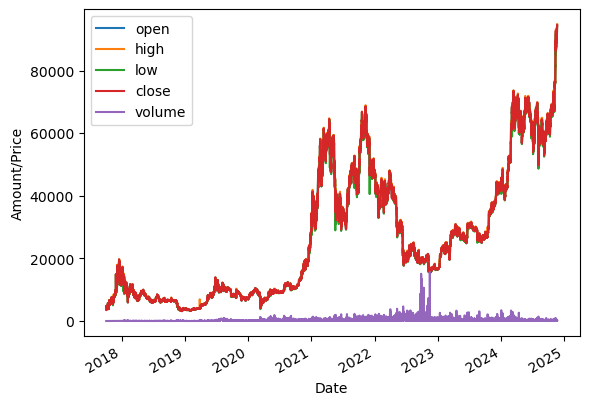

In [28]:
kline = tk.kuc_collect_multi_kline("BTC-USDT", "hour", 1, 100)
kline = tk.change_to_datetime(kline)
kline.head()
kline[['open', 'high', 'low', 'close', 'volume']].plot(xlabel="Date", ylabel="Amount/Price")
highs_and_lows = kline[["high", "low", "volume"]]

In [29]:
highs_and_lows

,high,low,volume
time,,,
2017-10-04 00:00:00,4307.0,4307.0,0.001000
2017-10-04 05:00:00,4307.0,4307.0,0.028360
2017-10-05 09:00:00,3500.0,3500.0,0.010368
2017-10-05 20:00:00,4860.0,4860.0,0.015000
2017-10-06 22:00:00,3850.0,3850.0,0.003568
...,...,...,...
2024-11-20 15:00:00,94600.0,93811.3,178.703209
2024-11-20 16:00:00,94490.8,93900.0,91.525620
2024-11-20 17:00:00,94486.4,93927.3,68.473261


In [30]:
kline

,open,close,high,low,volume,turnover
time,,,,,,
2017-10-04 00:00:00,4307.0,4307.0,4307.0,4307.0,0.001000,4.307000e+00
2017-10-04 05:00:00,4307.0,4307.0,4307.0,4307.0,0.028360,1.221450e+02
2017-10-05 09:00:00,3500.0,3500.0,3500.0,3500.0,0.010368,3.628769e+01
2017-10-05 20:00:00,4860.0,4860.0,4860.0,4860.0,0.015000,7.290000e+01
2017-10-06 22:00:00,3850.0,3850.0,3850.0,3850.0,0.003568,1.373645e+01
...,...,...,...,...,...,...
2024-11-20 15:00:00,94007.9,94247.1,94600.0,93811.3,178.703209,1.685288e+07
2024-11-20 16:00:00,94266.7,94361.4,94490.8,93900.0,91.525620,8.629126e+06
2024-11-20 17:00:00,94361.4,94161.0,94486.4,93927.3,68.473261,6.450837e+06


<Axes: xlabel='time'>

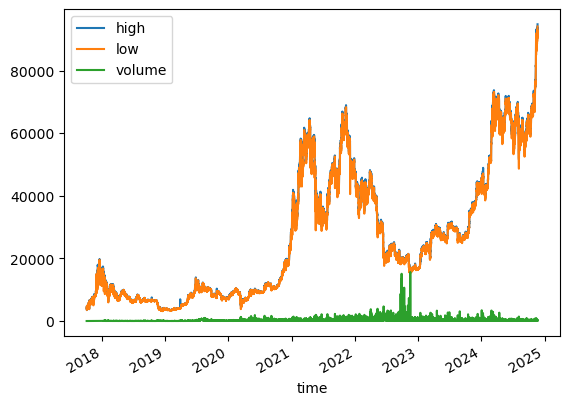

In [31]:
highs_and_lows.plot()


In [32]:
highs_and_lows["High Percent Change"] = highs_and_lows["high"].pct_change(24)
highs_and_lows["Low Percent Change"] = highs_and_lows["low"].pct_change(24)
highs_and_lows["Volume Percent Change"] = highs_and_lows["volume"].pct_change(24)

C:\Users\Eza\AppData\Local\Temp\ipykernel_14816\1631046923.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highs_and_lows["High Percent Change"] = highs_and_lows["high"].pct_change(24)
C:\Users\Eza\AppData\Local\Temp\ipykernel_14816\1631046923.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highs_and_lows["Low Percent Change"] = highs_and_lows["low"].pct_change(24)


In [33]:
highs_and_lows.corr()["Volume Percent Change"]

high                    -0.000423
low                     -0.000508
volume                   0.009313
High Percent Change      0.001688
Low Percent Change      -0.001210
Volume Percent Change    1.000000
Name: Volume Percent Change, dtype: float64

          mean    median
time                    
1     1.510587 -0.016728
2          inf -0.032349
3     0.490986 -0.022098
4          inf -0.004612
5     0.382962 -0.002877
6     0.603958 -0.017502
7          inf  0.007467
8          inf -0.026670
9          inf -0.014561
10    1.337051 -0.017812
11    4.718314 -0.006441
12         inf -0.023974


<Axes: xlabel='time'>

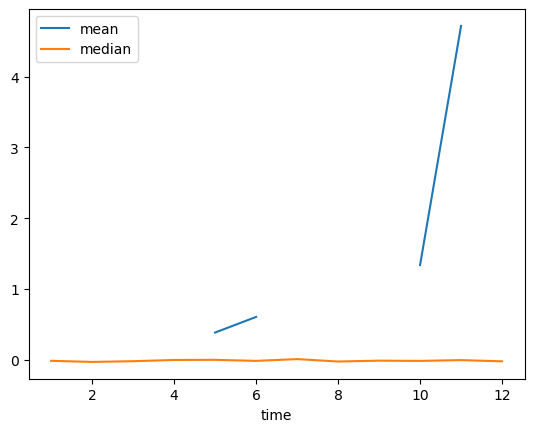

In [34]:
#quarterly_sales = df_home_sales["homes_sold"].groupby(by=[df_home_sales.index.quarter]).sum()
bitcoin_data = highs_and_lows["Volume Percent Change"].groupby(by=[highs_and_lows.index.month]).agg(["mean", "median"])
print(bitcoin_data)
bitcoin_data.plot()

          mean    median
time                    
1     0.002055  0.002657
2     0.005124  0.002262
3     0.001688  0.002678
4     0.002943  0.002376
5    -0.000343  0.001754
6    -0.001275  0.000430
7     0.003649  0.001945
8    -0.001071  0.000097
9    -0.001193  0.001051
10    0.006784  0.001922
11    0.001767  0.002235
12    0.003332  0.000724


<Axes: xlabel='time'>

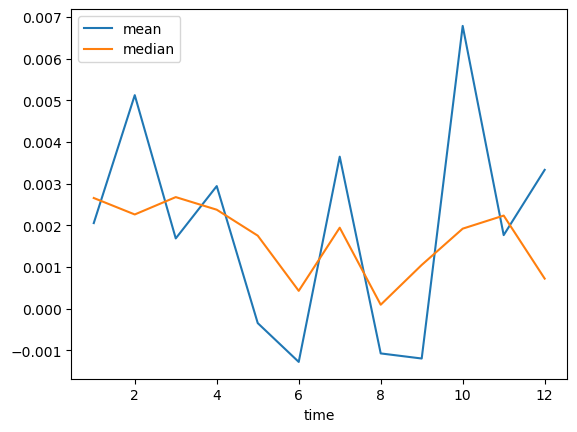

In [35]:
#quarterly_sales = df_home_sales["homes_sold"].groupby(by=[df_home_sales.index.quarter]).sum()
bitcoin_data = highs_and_lows["Low Percent Change"].groupby(by=[highs_and_lows.index.month]).agg(["mean", "median"])
print(bitcoin_data)
bitcoin_data.plot()

          mean    median
time                    
1     0.001711  0.001262
2     0.005082  0.001132
3     0.001405  0.001265
4     0.002977  0.001072
5    -0.000526  0.000449
6    -0.001252 -0.000906
7     0.003560  0.001258
8    -0.001168 -0.000716
9    -0.001210 -0.000004
10    0.006691  0.001007
11    0.001948  0.000921
12    0.003227 -0.000259


<Axes: xlabel='time'>

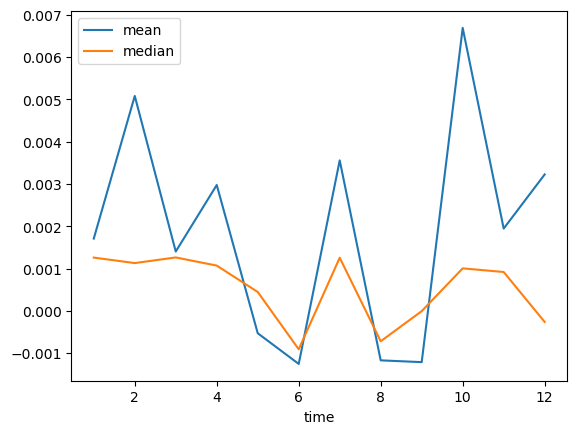

In [36]:
#quarterly_sales = df_home_sales["homes_sold"].groupby(by=[df_home_sales.index.quarter]).sum()
bitcoin_data = highs_and_lows["High Percent Change"].groupby(by=[highs_and_lows.index.month]).agg(["mean", "median"])
print(bitcoin_data)
bitcoin_data.plot()


           mean    median
time                     
2017  21.087235  0.059595
2018   1.378240 -0.012983
2019        inf  0.003395
2020   0.494535 -0.012986
2021        inf -0.013819
2022        inf -0.033287
2023        inf -0.023730
2024   0.558816 -0.022492


<Axes: xlabel='time'>

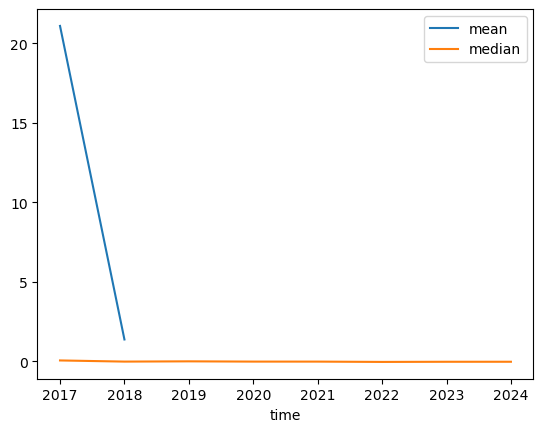

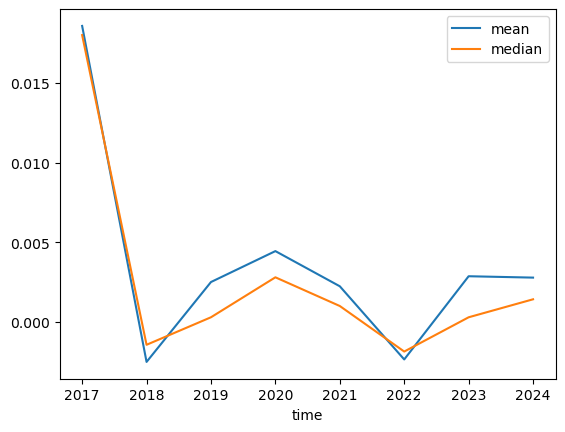

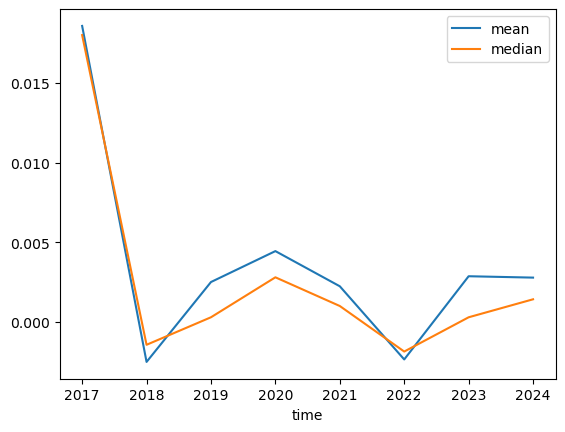

In [37]:

bitcoin_data = highs_and_lows["Volume Percent Change"].groupby(by=[highs_and_lows.index.year]).agg(["mean", "median"])
print(bitcoin_data)
bitcoin_data.plot()

bitcoin_data = highs_and_lows["High Percent Change"].groupby(by=[highs_and_lows.index.year]).agg(["mean", "median"])
bitcoin_data.plot()

bitcoin_data = highs_and_lows["High Percent Change"].groupby(by=[highs_and_lows.index.year]).agg(["mean", "median"])
bitcoin_data.plot()

                mean    median
time time                     
2017 10    13.540868  0.212338
     11    34.095517 -0.027404
     12    11.969589  0.040236
2018 1      6.900433  0.005598
     2      0.379033 -0.031515
...              ...       ...
2024 7      0.448700  0.046899
     8      0.543979 -0.060695
     9      0.580930  0.015228
     10     0.571140 -0.039727
     11     0.577211 -0.028117

[86 rows x 2 columns]


<Axes: xlabel='time,time'>

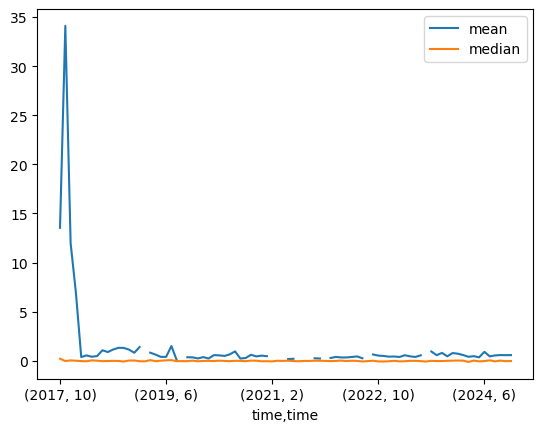

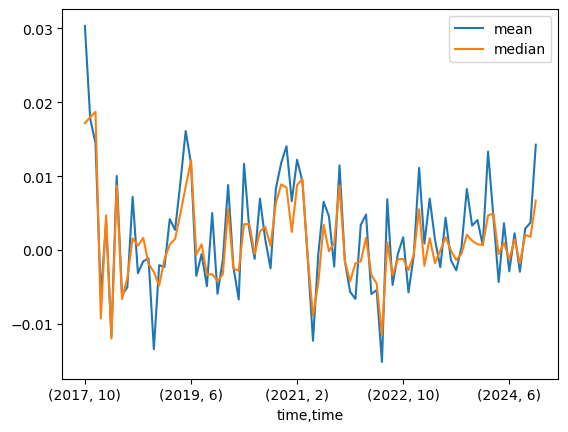

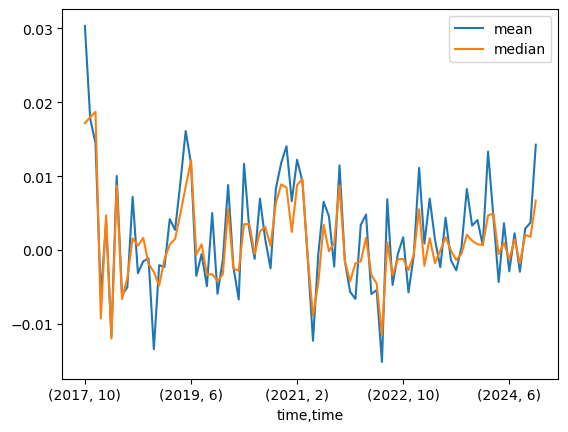

In [38]:
#quarterly_sales = df_home_sales["homes_sold"].groupby(by=[df_home_sales.index.quarter]).sum()
bitcoin_data = highs_and_lows["Volume Percent Change"].groupby(by=[highs_and_lows.index.year, highs_and_lows.index.month]).agg(["mean", "median"])
print(bitcoin_data)
bitcoin_data.plot()

bitcoin_data = highs_and_lows["High Percent Change"].groupby(by=[highs_and_lows.index.year, highs_and_lows.index.month]).agg(["mean", "median"])
bitcoin_data.plot()

bitcoin_data = highs_and_lows["High Percent Change"].groupby(by=[highs_and_lows.index.year, highs_and_lows.index.month]).agg(["mean", "median"])
bitcoin_data.plot()

In [39]:
correlation = kline[["high", "low", "volume"]].corr()
correlation

,high,low,volume
high,1.000000,0.999904,0.149121
low,0.999904,1.000000,0.144794
volume,0.149121,0.144794,1.000000


<Axes: >

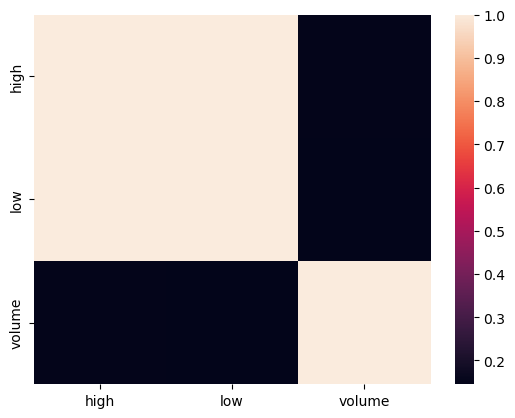

In [40]:
import seaborn as sns
sns.heatmap(correlation)


In [41]:
kline.groupby("time").agg({"high":"mean"})

,high
time,
2017-10-04 00:00:00,4307.0
2017-10-04 05:00:00,4307.0
2017-10-05 09:00:00,3500.0
2017-10-05 20:00:00,4860.0
2017-10-06 22:00:00,3850.0
...,...
2024-11-20 15:00:00,94600.0
2024-11-20 16:00:00,94490.8
2024-11-20 17:00:00,94486.4


<Axes: xlabel='time,time'>

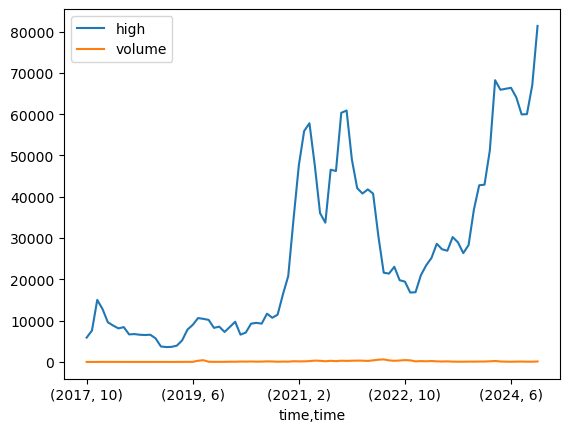

In [42]:
kline[["high", "volume"]].groupby(by=[kline.index.year, kline.index.month]).median().plot()


<Axes: xlabel='time,time'>

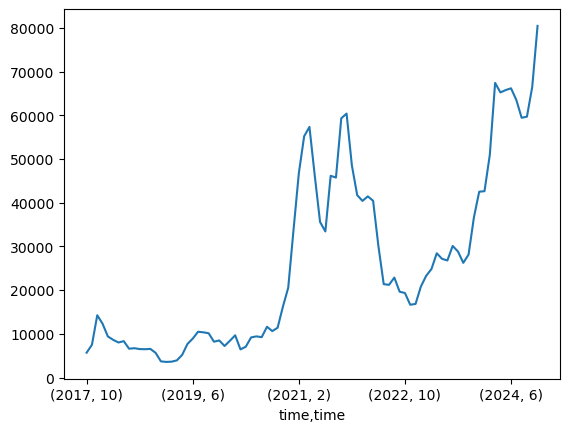

In [43]:
kline["low"].groupby(by=[kline.index.year, kline.index.month]).median().plot()


<Axes: xlabel='time,time'>

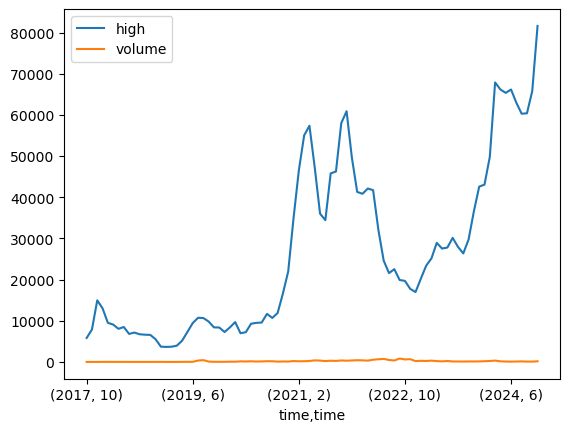

In [44]:
kline[["high", "volume"]].groupby(by=[kline.index.year, kline.index.month]).mean().plot()

<Axes: xlabel='time'>

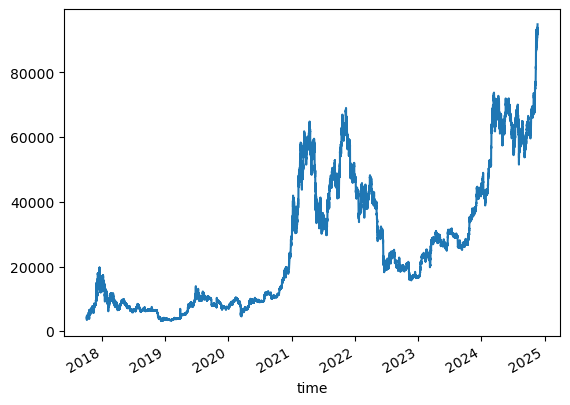

In [45]:
kline.high.plot()

<Axes: xlabel='time'>

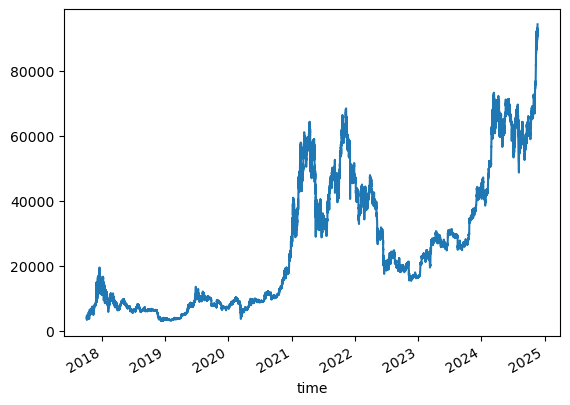

In [46]:
kline.low.plot()

<Axes: xlabel='time'>

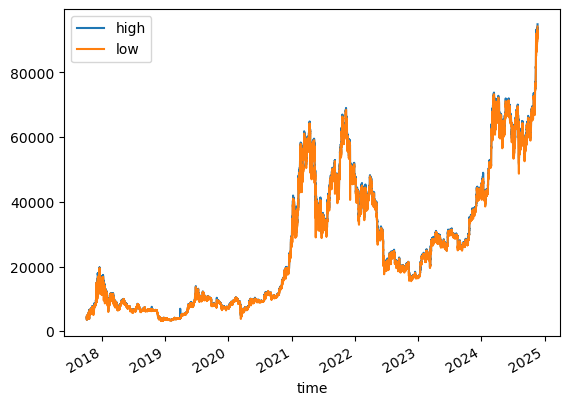

In [47]:
kline[["high", "low"]].plot()